---

# Data Mining Lab03 (231002)

---

# ✅ 실습파일 제출안내
- 제출 : 실습을 수행한 후 모든 코드가 돌아간 노트북 파일을 아이캠퍼스에 제출하세요.
- 파일 : lab03-학번+이름.ipynb
- 기한 : 10월 8일 11:59분까지

# ✅ [4주차] 수업 내용
### 1. Network Property : 네트워크의 특징을 이해하기 위한 대표 지표들
-> 우리가 구축한 네트워크가 다른 네트워크와 비교해서 어떤 특징이 있는지, 어떤 성격을 가지고 있는 네트워크인지 이해하기 위한 지표

    - Degree
    - Path
    - Diameter (Average Path Length)
    - Clustering Coefficient
    - Connectivity
### 2. Random Graph
-> 이런 그래프와 비교했을 때 우리 그래프는 어떤 특징이 있다를 보여줄 수도 있음

    - 네트워크의 특징을 비교하기 위한 베이스라인으로 사용.
    - Erodos-Renyi Random Graph
### 3. Small World Model
    - Real world 네트워크의 특성 반영.
    - Low average path length & high clustering coefficient
    - Watts_strogatz_graph

# ✅ [Lab03] 실습 구성
1. 수업 내용 실습
    - NetworkX를 이용한 그래프 생성
    - Network Property 출력
    - Random Graph 생성
    - Small World Model 생성
2. Graph Visualization
    - Graph 시각화 (Benchmark 데이터 & NetworkX)
    - Large Graph 시각화 (외부 데이터 & Gephi)

---

# [Environment Setting]

In [1]:
# Install DGL library
!pip install -q dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 634.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import dgl
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


---

# [Lab02 Review] : DGL 그래프 생성 및 시각화
-> DCL : 그래프 러닝에 특화된 패키지

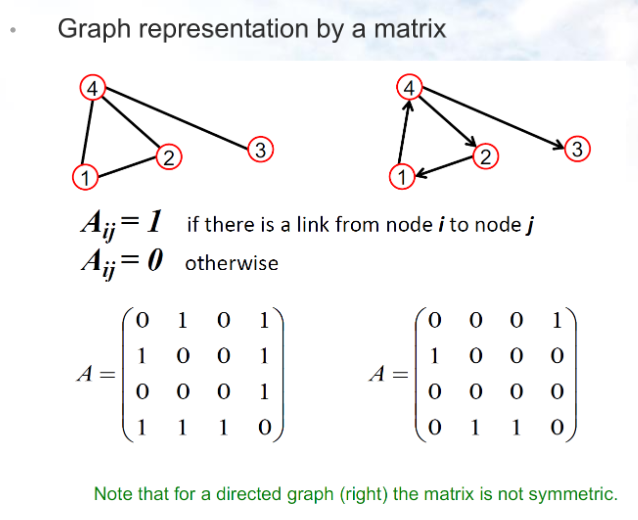

##  그래프 정의 방법 1 : 출발 노드 번호, 도착 노드 번호 지정

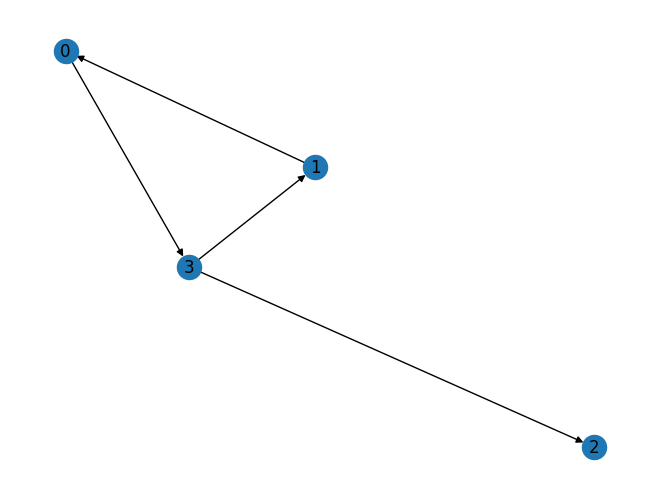

In [ ]:
# Create a graph
u, v = torch.tensor([0, 1, 3, 3]), torch.tensor([3, 0, 1, 2]) #각각 출발노드 / 도착노드를 표현하는 텐서
g = dgl.graph((u, v)) #튜플로 전달

# Visualization (NetworkX)
nx_G = dgl.to_networkx(g) #networkx객로 바꿔준다
nx.draw(nx_G, with_labels=True) #시각화

## 그래프 정의 방법 2 : 인접 노드 행렬 초기화


== Adjacency matrix: 
 tensor([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 1, 1, 0]])
== adj to edge list: 
 tensor([[0, 1, 3, 3],
        [3, 0, 1, 2]])


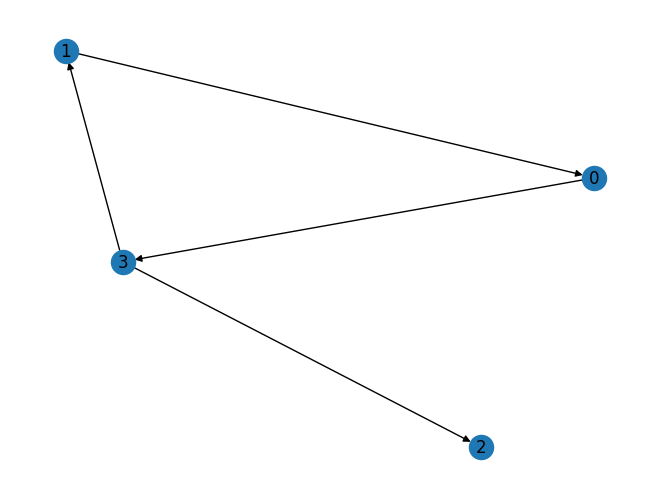

In [3]:
# Define adjacency matrix
adj = torch.tensor([[0,0,0,1],[1,0,0,0],[0,0,0,0],[0,1,1,0]]) #인접노트 정보 행렬 (2차원 리스트)
print("== Adjacency matrix: \n", adj)
adj_t = torch.nonzero(adj).T #0이아닌 숫자들이 있는 인덱스 반환 가능
print("== adj to edge list: \n", adj_t)

# Create a graph
u,v = adj_t[0], adj_t[1]
g = dgl.graph((u, v))

# Visualization (NetworkX)
nx_G = dgl.to_networkx(g)
nx.draw(nx_G, with_labels=True)

## 3. Heterogeneous Graph
- Node type이 두 개 이상인 그래프를 의미.
- Node type이 여러 개임에 따라 연결되는 Edge의 형태도 다양함.

In [5]:
graph_data = { #graph_data라는 사전안에
   ('user', 'play', 'game'): (torch.tensor([0,0,1,1,1,2]), torch.tensor([1,2,0,2,3,2])), #각 edge타입 -> key(user play game) / value <- (출발노드의 인덱스, 도착노드의 인덱스) 튜플로
   ('user', 'follow', 'user') : (torch.tensor([0,0,0,1,1,2,3,3]), torch.tensor([1,2,4,2,3,3,4,1])) #user와 user사이에 follow라는 edge타입 존재
}

g = dgl.heterograph(graph_data)
print(g)
print("== Node types: ",g.ntypes)
print("== Edge types: ",g.etypes)
print("== Typical edge types  : ",g.canonical_etypes)

Graph(num_nodes={'game': 4, 'user': 5},
      num_edges={('user', 'follow', 'user'): 8, ('user', 'play', 'game'): 6},
      metagraph=[('user', 'user', 'follow'), ('user', 'game', 'play')])
== Node types:  ['game', 'user']
== Edge types:  ['follow', 'play']
== Typical edge types  :  [('user', 'follow', 'user'), ('user', 'play', 'game')]


### 이때, dgl.to_networkx는 homogeneous 그래프에 대해서만 가능
-> heterogeneous그래프를 시각화 하고자 할 때, homogeneous그래프로 바꿔서 해야함

== Node types:  ['game', 'user']
== Node type of each node:  tensor([0, 0, 0, 0, 1, 1, 1, 1, 1])
== # of nodes:  9


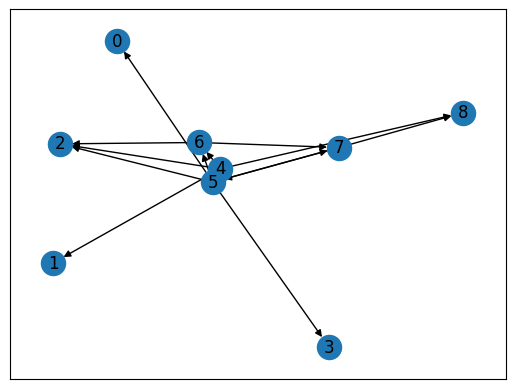

In [6]:
# Change heterogeneous graph to homogeneous graph
g_hete2homo = dgl.to_homogeneous(g)

print("== Node types: " ,g.ntypes)
print("== Node type of each node: ", g_hete2homo.ndata[dgl.NTYPE])
print("== # of nodes: ", g_hete2homo.num_nodes())

nx_hete2homo = dgl.to_networkx(g_hete2homo)
nx.draw_networkx(nx_hete2homo)

이 경우 노드가 모두 같은 색으로 표기되어 구분이 어려움!

---

# ✅ NetworkX
- 보다 복잡한 그래프 시각화 가능.
- 다양한 Network Property 관련 함수 제공.
- 오늘은 Networkx를 이용한 그래프를 정의하여 다양한 실습을 해볼 예정.

# 1. NetworkX Graph 생성 및 시각화

## 1-1. NetworkX 그래프 정의

In [7]:
# Create an undirected graph G (방향이 없는 그래프)
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H (방향성이 있는 그래프)
H = nx.DiGraph()
print(H.is_directed())

False
True


## 1-2. Add Node

In [9]:
# Add one node
G.add_node(0) #노드 추가 -> 0이라는 이름의 노드
# Add one node with node level attributes
G.add_node(0, feature=1, label=0) #feature, label이라는 attribute를 지정해줄 수 있음 (node를 대표하는 속성값 -> user의 gender 같은)

In [10]:
# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 1, 'label': 0}


In [11]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 3, "label": 3})
]) #(node, attrdict)

In [12]:
# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

(0, {'feature': 1, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
(3, {'feature': 3, 'label': 3})


In [13]:
# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 4 nodes


## 1-3. Add Edge

In [14]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5) #edge를 추가할 때에는 출발노드와 도착노드 둘다 지정

In [15]:
# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [16]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
  (3, 1, {"weight": 0.4})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges(data=True):
    print(edge)
    print(G.get_edge_data(edge[0], edge[1]))

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1, {'weight': 0.5})
{'weight': 0.5}
(0, 2, {'weight': 0.1})
{'weight': 0.1}
(1, 2, {'weight': 0.3})
{'weight': 0.3}
(1, 3, {'weight': 0.4})
{'weight': 0.4}
G has 4 edges


## 1-4. Visualization

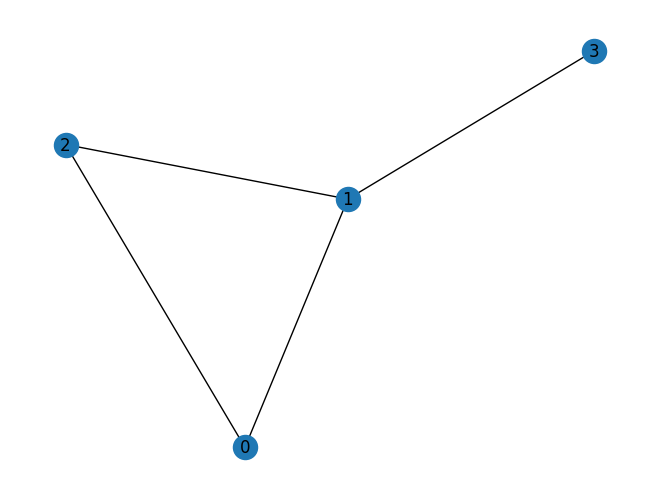

In [17]:
# Draw the graph
nx.draw(G, with_labels=True) #G -> 무방향그래프

### directed graph

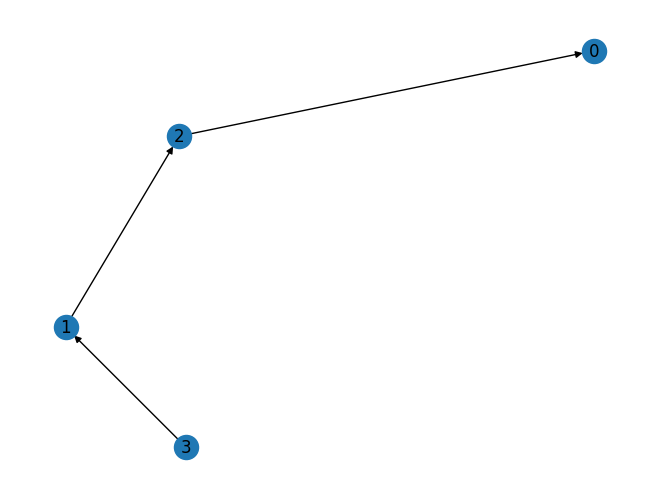

In [18]:
# Add multiple nodes with attributes
H.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2}),
  (3, {"feature": 3, "label": 3})
]) #(node, attrdict)

# Add multiple edges with edge weights
H.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1}),
  (3, 1, {"weight": 0.4})
])

nx.draw(H, with_labels=True) #단방향 그래프

# 2. Network Property
- 네트워크의 특징을 나타낼 수 있는 요소들
  - Degree
  - Path
  - Diameter & Average Path Length
  - Coefficient Clustering

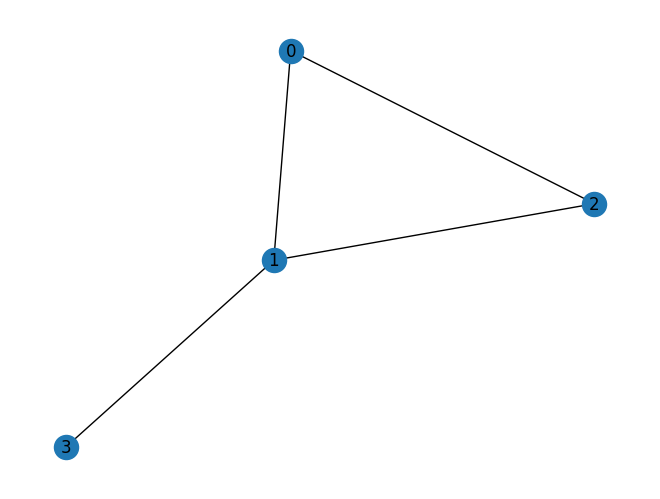

In [19]:
# Draw the graph
nx.draw(G, with_labels=True)

## 2-1. Degree
- degree : 한 노드가 다른 노드와 얼마나 연결되어 있는가
(이웃노드 몇개야)

In [20]:
node_id = 0

In [21]:
# Degree of node : G.degree[node_id]
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

Node 0 has degree 2


In [22]:
# Get neighbor of node : G.neighbors(node_id)
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 0 has neighbor 1
Node 0 has neighbor 2


In [23]:
# Directed Graph인 경우 in_degree, out_degree 있음.
print("Node {} has degree {}".format(node_id, H.in_degree[node_id]))
print("Node {} has degree {}".format(node_id, H.out_degree[node_id]))

Node 0 has degree 1
Node 0 has degree 0


## 2-2. Path
- shortest_path : 시작 노드에서 도착 노드까지로 가는 최단 경로
- distance (length) : 시작 노드에서 도착 노드까지 이동하는 데 대한 거리

In [24]:
# Shortest Path between two nodes (0, 3)
print("The shortes path from {} to {} is {}".format(0, 3, nx.shortest_path(G, 0, 3))) #0에서 출발 3에 도착하는 경로

The shortes path from 0 to 3 is [0, 1, 3]


In [25]:
# Shortest Path between two nodes (0, 2)
print("The shortes path from {} to {} is {}".format(0, 2, nx.shortest_path(G, 0, 2)))

The shortes path from 0 to 2 is [0, 2]


In [26]:
# 각 node pair에 대한 shortest path 출력. (path -> edge의 수)
for source_id in G.nodes():
    for dest_id in range(source_id+1, G.number_of_nodes()):
        path = nx.shortest_path(G, source_id, dest_id)
        print("The shortest path from {} to {} is {}, \nlength: {}".format(
            source_id, dest_id,
            nx.shortest_path(G, source_id, dest_id),
            len(nx.shortest_path(G, source_id, dest_id))-1))

The shortest path from 0 to 1 is [0, 1], 
length: 1
The shortest path from 0 to 2 is [0, 2], 
length: 1
The shortest path from 0 to 3 is [0, 1, 3], 
length: 2
The shortest path from 1 to 2 is [1, 2], 
length: 1
The shortest path from 1 to 3 is [1, 3], 
length: 1
The shortest path from 2 to 3 is [2, 1, 3], 
length: 2


## 2-3. Diameter / Avg Path Length
(그래프를 대표하는 값을 확인) ex. 다른 네트워크에 비해 우리 네트워크의 path가 크다 -> node끼리의 연결관계 유추 가능

- Diagmeter : maximum distance (pair들 간의 거리 중에서 가장 긴 거리)
- Average Path Length : 평균적으로 한 노드에서 다른 노드로 가는 데 걸리는 거리

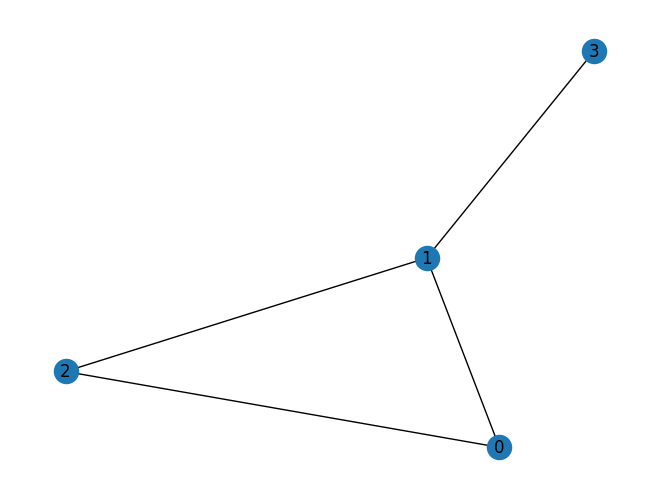

In [27]:
# Draw the graph
nx.draw(G, with_labels=True)

In [28]:
# Diameter for Graph (max-distance)
nx.diameter(G)

2

In [29]:
# Average Path Length
nx.average_shortest_path_length(G) # 8 / 6 = 1.33333

1.3333333333333333

## 2-4. Coefficient Clustering
- 얼마나 평균적으로 이웃노드끼리 서로 연결되어 있는지에 대한 값
(small world graph와 관련)

In [30]:
# Coefficient Clustering : nx.clustering(Graph, Node_id)
node_id = 0
print("Node {}'s clustering coefficient".format(node_id), nx.clustering(G, node_id))

Node 0's clustering coefficient 1.0


In [31]:
# Coefficient Clustering : nx.clustering(Graph, Node_id)
node_id = 1
print("Node {}'s clustering coefficient".format(node_id), nx.clustering(G, node_id))

Node 1's clustering coefficient 0.3333333333333333


In [32]:
# Coefficient Clustering for all nodes
print("Clustering Coefficient for All Node : ", nx.clustering(G))
print("Average Clustering Coefficient for G : ", nx.average_clustering(G))

Clustering Coefficient for All Node :  {0: 1.0, 1: 0.3333333333333333, 2: 1.0, 3: 0}
Average Clustering Coefficient for G :  0.5833333333333333


# 3. Baseline Graph
- 레퍼런스가 될 수 있는 기본적인 베이스라인 네트워크와의 비교를 통해, 분석하고자 하는 네트워크의 뚜렷한 특징을 확인할 수 있음.

## 3-1. Random Graph
(랜덤으로 연결된 그래프를 그림)
- Erodos-Renyi Random Graph

In [33]:
# n : The number of nodes
# p : Probability for edge creation
n = 20 #노드 수
p = 0.5 #노드들간의 엣지가 생설될 확률
random_G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

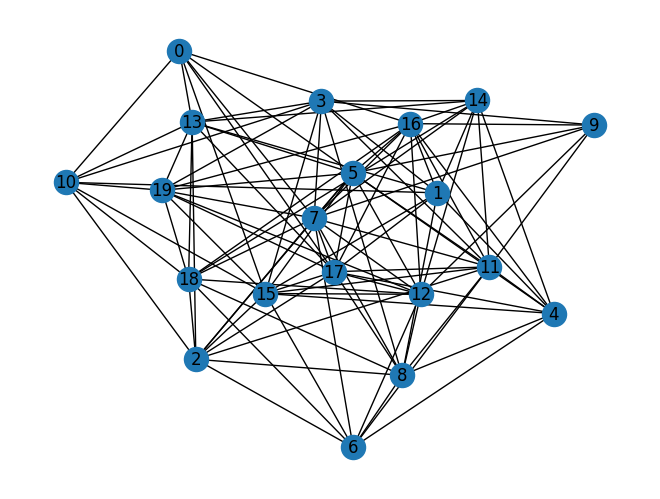

In [34]:
nx.draw(random_G, with_labels=True)

## 3-2. Small World Network (중요)
- Low average path length(노드에서 다른노드로 가능 평균거리가 짧다) & high clustering coefficient(내 이웃들간에 연결되어 있는 경우가 크다)
- 지정한 최근접 이웃과 완전히 연결된 Ring Network에서 시작하여,
- 세 번째 파라미터인 p (확률값)에 기반해 일부 엣지를 랜덤하게 바꾸는 Rewire 과정을 거치게 됨

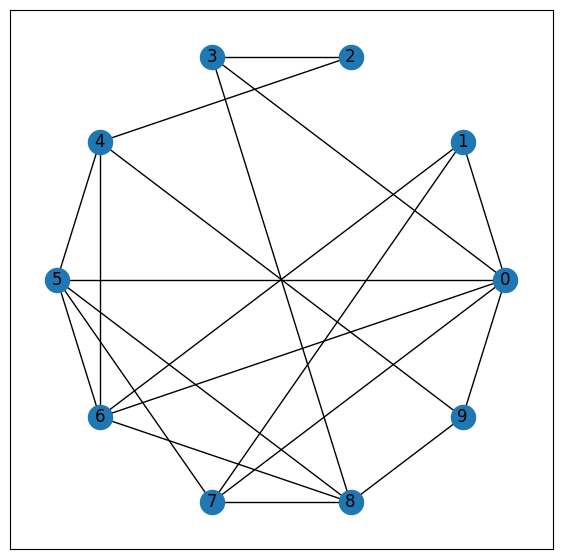

In [37]:
# watts_strogatz_graph
  # n : The number of nodes
  # k : Each node is joined with its k nearest neighbors in a ring topology.
  # p : The probability of rewiring each edge

G = nx.watts_strogatz_graph(n = 10, k = 5, p = 0.5)
pos = nx.circular_layout(G)

plt.figure(figsize = (7, 7))
nx.draw_networkx(G, pos)

rewire : p의 확률로 하나의 edge를 random 한 edge로 바꿔주는 과정


# 4. Graph Visualization
- Benchmark Dataset : Karate Club Graph
- External Dataset : COVID-19

## 4-1. Benchmark Dataset
### Karate Club Graph
- Node : 클럽 회원 (34명)
- Edge : 회원 간의 상호작용
- 두 개의 commnunity 존재 : Mr. Hi, Officier

In [38]:
# Define Karate Club Graph
G = nx.karate_club_graph()

In [39]:
G.nodes(data=True), G.number_of_nodes() # 34, two 'club' atrribute

(NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}}),
 34)

In [40]:
G.edges(data=True), G.number_of_edges() # 78

(EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


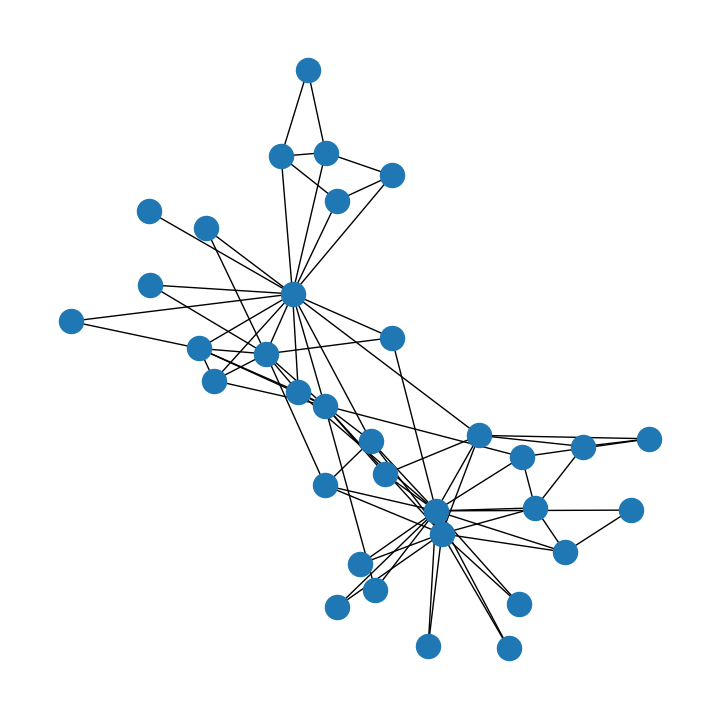

In [41]:
# Visualization
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'))
plt.show()

In [42]:
# Community 별로 나누어 시각화 해보자! (node attribute ['club'] 활용.)
G = nx.karate_club_graph()
community_map = {}
for node in G.nodes(data=True): #노드 순회하면서 해당 노드의 club에 따라서 분류
    if node[1]["club"] == "Mr. Hi":
        community_map[node[0]] = 0
    else:
        community_map[node[0]] = 1

In [43]:
node, node[1], node[1]['club'] # Assign Mr.Hi --> 0, Officier --> 1

((33, {'club': 'Officer'}), {'club': 'Officer'}, 'Officer')

In [44]:
# 각 노드가 어떤 club 유형에 속하는지에 대한 map
community_map

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

In [45]:
# 각 클럽 별 색상 번호 지정
node_color = []
color_map = {0: 0, 1: 1}
node_color = [color_map[community_map[node]] for node in G.nodes()]

In [46]:
node_color

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

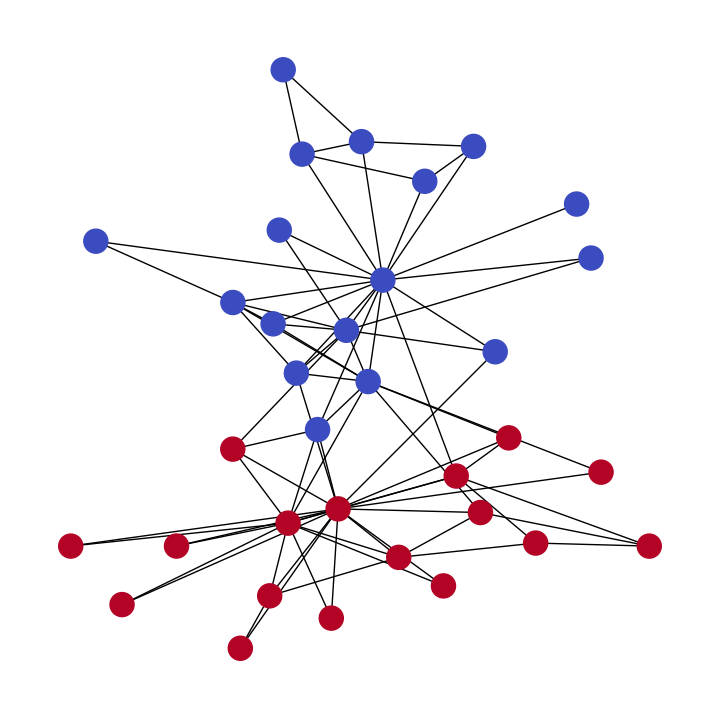

In [49]:
pos = nx.spring_layout(G)
plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color)
plt.show()

## 두 커뮤니티 내 상호작용은 어떻게 일어날까?

### Add Edge Type

In [50]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [51]:
for source_vs, target_vs in G.edges:
    # 두 회원이 같은 클럽인 경우
    if community_map[source_vs] == community_map[target_vs]:
        # Mr.Hi - Mr.Hi
        if community_map[source_vs] == 0:
            G.edges[source_vs, target_vs]['edge_type'] = "e0"
        # Officier - Officier
        else:
            G.edges[source_vs, target_vs]['edge_type'] = "e1"
    else:
    # 두 회원이 다른 클럽인 경우
        G.edges[source_vs, target_vs]['edge_type'] = "e2" # Mr.Hi - Officier

In [52]:
# 각 엣지 쌍 별로 엣지의 타입이 할당되었음.
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4, 'edge_type': 'e0'}), (0, 2, {'weight': 5, 'edge_type': 'e0'}), (0, 3, {'weight': 3, 'edge_type': 'e0'}), (0, 4, {'weight': 3, 'edge_type': 'e0'}), (0, 5, {'weight': 3, 'edge_type': 'e0'}), (0, 6, {'weight': 3, 'edge_type': 'e0'}), (0, 7, {'weight': 2, 'edge_type': 'e0'}), (0, 8, {'weight': 2, 'edge_type': 'e0'}), (0, 10, {'weight': 2, 'edge_type': 'e0'}), (0, 11, {'weight': 3, 'edge_type': 'e0'}), (0, 12, {'weight': 1, 'edge_type': 'e0'}), (0, 13, {'weight': 3, 'edge_type': 'e0'}), (0, 17, {'weight': 2, 'edge_type': 'e0'}), (0, 19, {'weight': 2, 'edge_type': 'e0'}), (0, 21, {'weight': 2, 'edge_type': 'e0'}), (0, 31, {'weight': 2, 'edge_type': 'e2'}), (1, 2, {'weight': 6, 'edge_type': 'e0'}), (1, 3, {'weight': 3, 'edge_type': 'e0'}), (1, 7, {'weight': 4, 'edge_type': 'e0'}), (1, 13, {'weight': 5, 'edge_type': 'e0'}), (1, 17, {'weight': 1, 'edge_type': 'e0'}), (1, 19, {'weight': 2, 'edge_type': 'e0'}), (1, 21, {'weight': 2, 'edge_type': 'e0'}), (1, 30, 

In [53]:
# Assign color for each edge types
edge_color = {}
for edge in G.edges(data=True):
    # Edges within club "Mr. Hi"
    n1, n2, _ = edge
    if edge[2]['edge_type'] == 'e0':
        edge_color[(n1, n2)] = 'blue'
    # Edges within club "Officer"
    elif edge[2]['edge_type'] == 'e1':
        edge_color[(n1, n2)] = 'red'
    # Edges between clubs
    else: # 'e2'
        edge_color[(n1, n2)] = 'green'

In [54]:
edge_color

{(0, 1): 'blue',
 (0, 2): 'blue',
 (0, 3): 'blue',
 (0, 4): 'blue',
 (0, 5): 'blue',
 (0, 6): 'blue',
 (0, 7): 'blue',
 (0, 8): 'blue',
 (0, 10): 'blue',
 (0, 11): 'blue',
 (0, 12): 'blue',
 (0, 13): 'blue',
 (0, 17): 'blue',
 (0, 19): 'blue',
 (0, 21): 'blue',
 (0, 31): 'green',
 (1, 2): 'blue',
 (1, 3): 'blue',
 (1, 7): 'blue',
 (1, 13): 'blue',
 (1, 17): 'blue',
 (1, 19): 'blue',
 (1, 21): 'blue',
 (1, 30): 'green',
 (2, 3): 'blue',
 (2, 7): 'blue',
 (2, 8): 'blue',
 (2, 9): 'green',
 (2, 13): 'blue',
 (2, 27): 'green',
 (2, 28): 'green',
 (2, 32): 'green',
 (3, 7): 'blue',
 (3, 12): 'blue',
 (3, 13): 'blue',
 (4, 6): 'blue',
 (4, 10): 'blue',
 (5, 6): 'blue',
 (5, 10): 'blue',
 (5, 16): 'blue',
 (6, 16): 'blue',
 (8, 30): 'green',
 (8, 32): 'green',
 (8, 33): 'green',
 (9, 33): 'red',
 (13, 33): 'green',
 (14, 32): 'red',
 (14, 33): 'red',
 (15, 32): 'red',
 (15, 33): 'red',
 (18, 32): 'red',
 (18, 33): 'red',
 (19, 33): 'green',
 (20, 32): 'red',
 (20, 33): 'red',
 (22, 32): 'red'

In [55]:
# Set edge attribute (apply!)
nx.classes.function.set_edge_attributes(G, edge_color, name='color')

In [56]:
# Check attribute!
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4, 'edge_type': 'e0', 'color': 'blue'}), (0, 2, {'weight': 5, 'edge_type': 'e0', 'color': 'blue'}), (0, 3, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 4, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 5, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 6, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 7, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 8, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 10, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 11, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 12, {'weight': 1, 'edge_type': 'e0', 'color': 'blue'}), (0, 13, {'weight': 3, 'edge_type': 'e0', 'color': 'blue'}), (0, 17, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 19, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 21, {'weight': 2, 'edge_type': 'e0', 'color': 'blue'}), (0, 31, {'weight': 2, 'edge_type': 'e2', 'color': 'green'}), (1, 2, {'weight': 6, 'edge_type':

In [57]:
edge_color = nx.get_edge_attributes(G,'color').values()
edge_color

dict_values(['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'green', 'blue', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'red', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'])

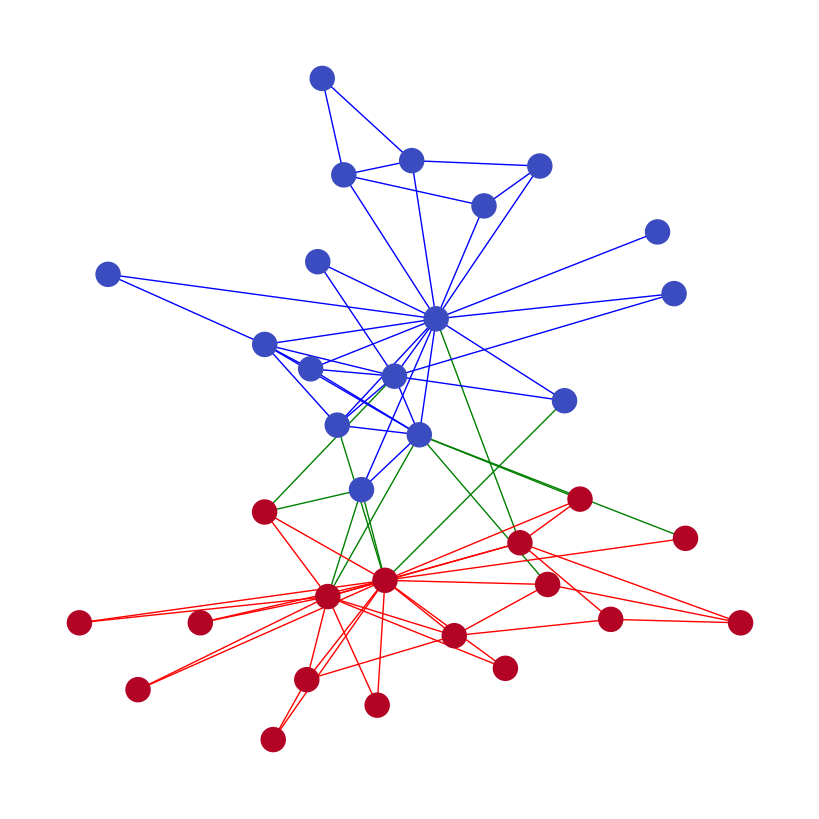

In [58]:
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=edge_color)
plt.show()

## Add Node Type

In [59]:
# Add node type!
for vs_id, club in community_map.items():
    G.nodes[vs_id]["node_type"] = "n0" if club == 0 else "n1"

In [60]:
# 새로운 Node Attribute 'node_type'
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi', 'node_type': 'n0'}, 1: {'club': 'Mr. Hi', 'node_type': 'n0'}, 2: {'club': 'Mr. Hi', 'node_type': 'n0'}, 3: {'club': 'Mr. Hi', 'node_type': 'n0'}, 4: {'club': 'Mr. Hi', 'node_type': 'n0'}, 5: {'club': 'Mr. Hi', 'node_type': 'n0'}, 6: {'club': 'Mr. Hi', 'node_type': 'n0'}, 7: {'club': 'Mr. Hi', 'node_type': 'n0'}, 8: {'club': 'Mr. Hi', 'node_type': 'n0'}, 9: {'club': 'Officer', 'node_type': 'n1'}, 10: {'club': 'Mr. Hi', 'node_type': 'n0'}, 11: {'club': 'Mr. Hi', 'node_type': 'n0'}, 12: {'club': 'Mr. Hi', 'node_type': 'n0'}, 13: {'club': 'Mr. Hi', 'node_type': 'n0'}, 14: {'club': 'Officer', 'node_type': 'n1'}, 15: {'club': 'Officer', 'node_type': 'n1'}, 16: {'club': 'Mr. Hi', 'node_type': 'n0'}, 17: {'club': 'Mr. Hi', 'node_type': 'n0'}, 18: {'club': 'Officer', 'node_type': 'n1'}, 19: {'club': 'Mr. Hi', 'node_type': 'n0'}, 20: {'club': 'Officer', 'node_type': 'n1'}, 21: {'club': 'Mr. Hi', 'node_type': 'n0'}, 22: {'club': 'Officer', 'node_type': 'n1'}, 2

In [61]:
edge_color = nx.get_edge_attributes(G,'color').values()
node_type = nx.get_node_attributes(G, 'node_type')

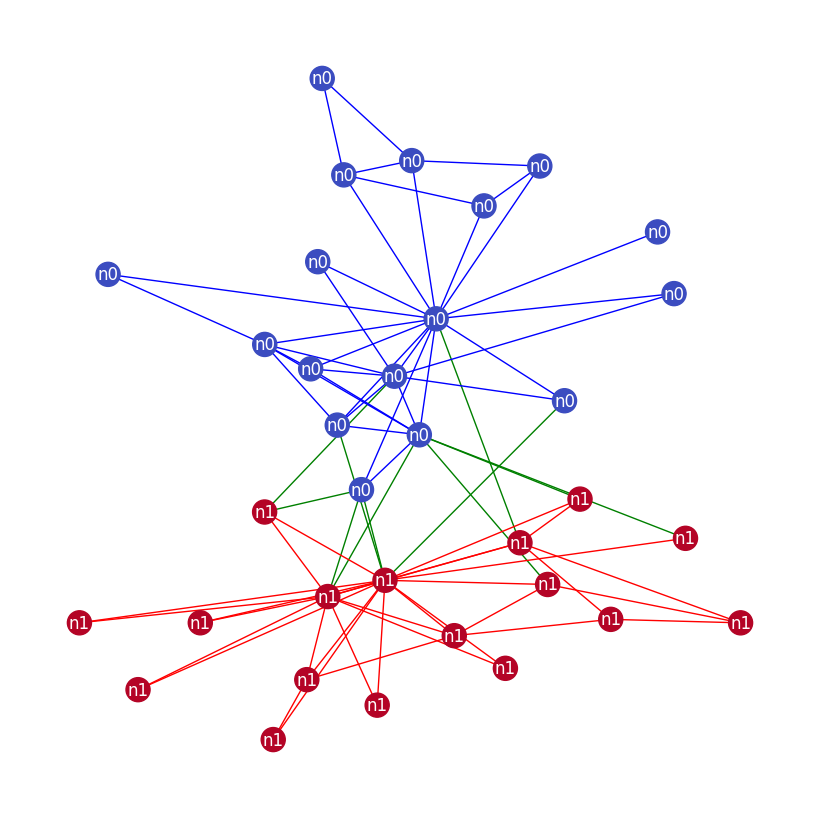

In [62]:
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=edge_color, labels=node_type, font_color='white')
plt.show()

## 4-2. 외부 데이터 (Covid-19)
- patiend_id : the ID of the patient
- infected_by : the ID of who infected the patient
- sex : the sex of the patient
- age : the age of the patient  
...

In [63]:
import pandas as pd

# load dataset
# [NeurIPS 2020] Data Science for COVID-19 (DS4C)
# https://www.kaggle.com/kimjihoo/coronavirusdataset/version/86

file_path = './PatientInfo.csv'
df = pd.read_csv(file_path, dtype={'patient_id': str, 'infected_by':str})
df #누구랑 누가 연결되어있는지가 중요 -> 누구에게 감염?

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [64]:
# drop rows where infected_by == NaN
df = df[~df.infected_by.isna()]
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,male,20s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,0,NaN,2020-01-31,2020-02-10,NaN,released
9,1000000010,female,60s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000003,6,NaN,2020-02-05,2020-02-29,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,6100000104,female,70s,Korea,Gyeongsangnam-do,Sancheong-gun,etc,6100000097,NaN,2020-03-26,2020-03-31,NaN,NaN,released
5123,6100000111,male,20s,Korea,Gyeongsangnam-do,Sacheon-si,contact with patient,6100000108,NaN,2020-04-04,2020-04-06,NaN,NaN,released
5124,6100000112,male,60s,Korea,Gyeongsangnam-do,Hapcheon-gun,contact with patient,6100000100,NaN,2020-04-03,2020-04-07,NaN,NaN,released
5126,6100000114,female,0s,Korea,Gyeongsangnam-do,Jinju-si,overseas inflow,6100000103,NaN,2020-04-01,2020-04-08,NaN,NaN,released


## Build Graph

In [65]:
g = nx.DiGraph( #방향이 있는 그래프
    df.loc[:, ('infected_by', 'patient_id')].values.tolist() #출발노드 -> 전파자 / 도착노드 -> 감염자
    )

In [66]:
g.number_of_nodes(), g.number_of_edges()

(1717, 1346)

## Add Attribute

In [67]:
gender_dict = {}
pid_list = list(df['patient_id'])
gender_list = list(df['sex'])

for i in range(len(df)):
    if type(gender_list[i]) == str:
      gender_dict[pid_list[i]] = gender_list[i]
    else:
      gender_list[i] = 'nan' # gender 값이 null인 경우 'nan'으로 할당.


In [68]:
gender_dict

{'1000000003': 'male',
 '1000000005': 'female',
 '1000000006': 'female',
 '1000000007': 'male',
 '1000000010': 'female',
 '1000000013': 'male',
 '1000000014': 'female',
 '1000000016': 'male',
 '1000000017': 'male',
 '1000000019': 'female',
 '1000000020': 'female',
 '1000000021': 'male',
 '1000000025': 'male',
 '1000000029': 'female',
 '1000000033': 'female',
 '1000000034': 'male',
 '1000000037': 'female',
 '1000000040': 'female',
 '1000000045': 'male',
 '1000000046': 'female',
 '1000000053': 'female',
 '1000000059': 'female',
 '1000000060': 'male',
 '1000000061': 'male',
 '1000000062': 'male',
 '1000000064': 'female',
 '1000000065': 'male',
 '1000000067': 'female',
 '1000000078': 'male',
 '1000000113': 'female',
 '1000000114': 'female',
 '1000000117': 'male',
 '1000000118': 'male',
 '1000000119': 'male',
 '1000000121': 'female',
 '1000000126': 'female',
 '1000000127': 'male',
 '1000000128': 'male',
 '1000000129': 'female',
 '1000000130': 'male',
 '1000000134': 'female',
 '1000000164': 

In [69]:
# graph node에 차례대로 할당. (female, male, nan)
for node_id in g.nodes():
    if gender_dict.get(node_id):
        g.nodes[node_id]['gender'] = gender_dict[node_id]
    else:
        g.nodes[node_id]['gender'] = 'nan'

In [70]:
nx.classes.function.set_node_attributes(g, gender_dict, name='gender')

In [71]:
len(g.nodes()), len(pid_list), len(gender_list) #나머지 약 400개는.. -> infected by가 전부 patience id에 있는것이 아니어서

(1717, 1346, 1346)

In [72]:
for node in g.nodes(data=True):
  print(node)
  break

('2002000001', {'gender': 'nan'})


In [73]:
nx.write_graphml_lxml(g, "practice_covid_graph.graphml")

## [Gephi] Visualization Tool for Large Graph
- Download : https://gephi.org/users/download/
- Open Graph
- Set Layout
- Change Appearance
- Check Network Property

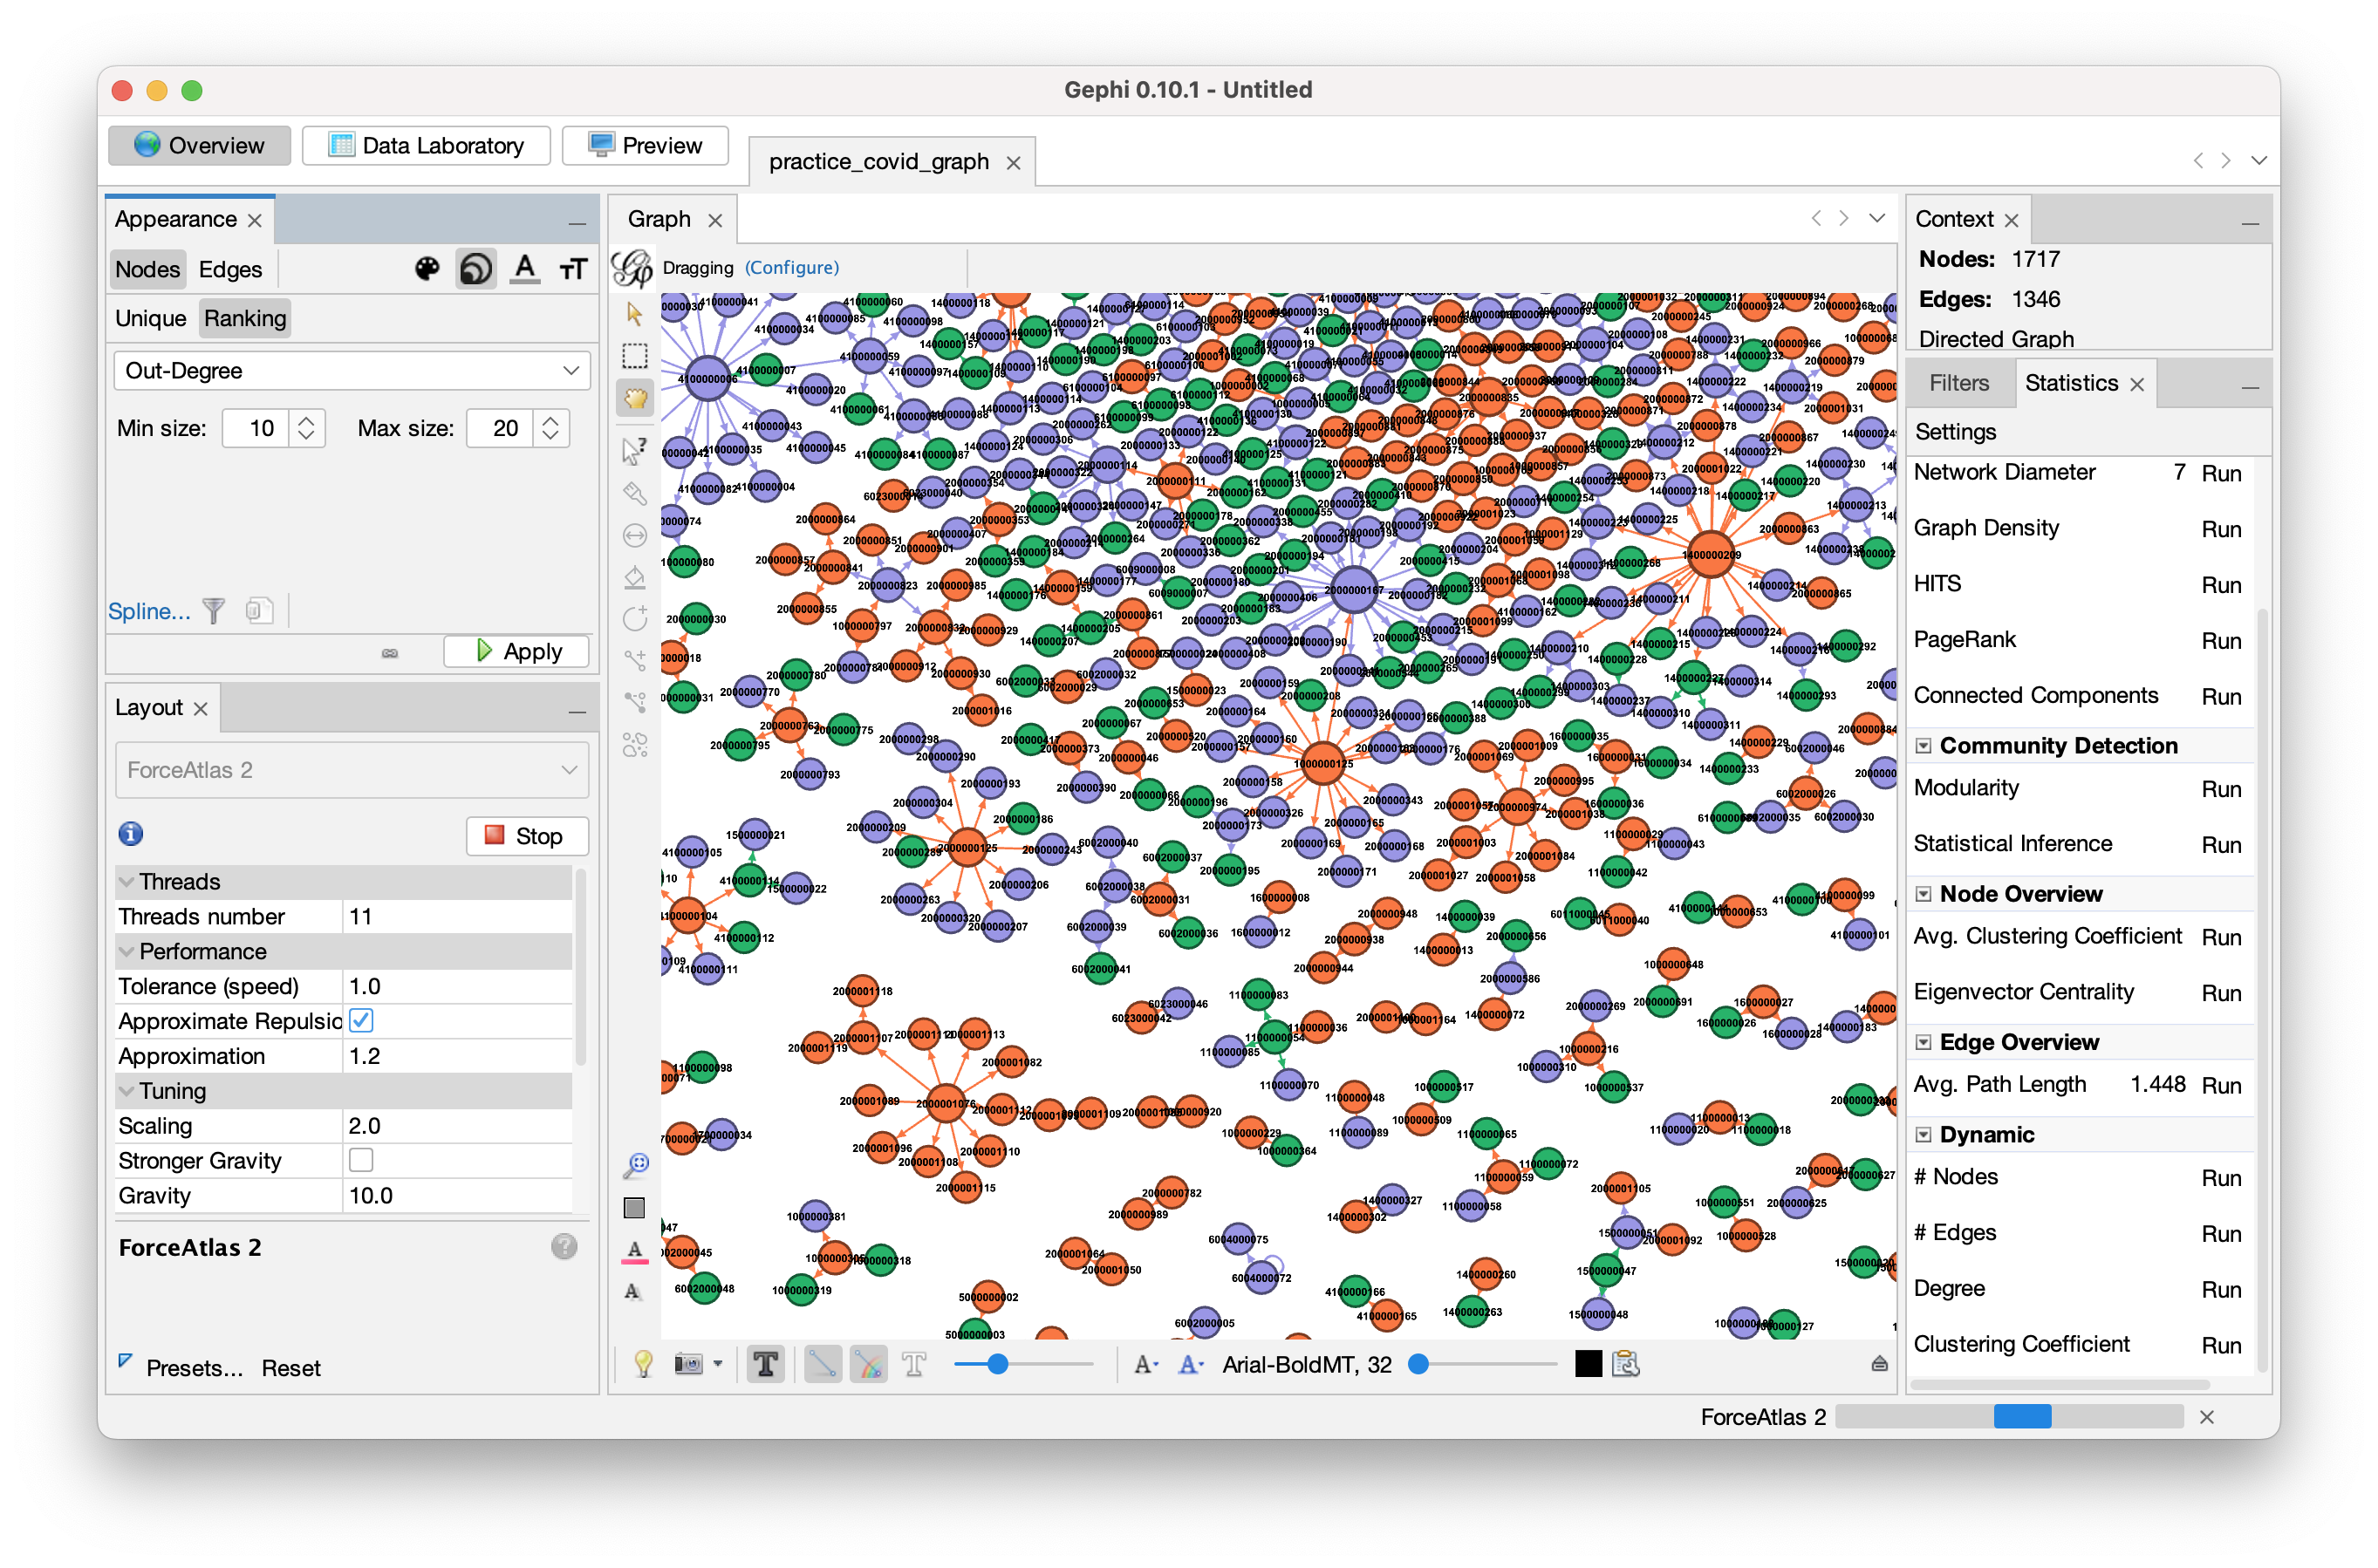